# 三维邻居网格
我们在本章中处理的邻居网格通常也适用于三维。只是在可视化方面更具挑战性。

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

我们在这里使用的图像数据显示了一个发育中的谷斑皮蠹（Tribolium castaneum）胚胎的局部，这是由德累斯顿MPI-CBG / CSBD的Myers实验室的Daniela Vorkel使用光片显微镜拍摄的。

In [2]:
raw_image = imread("../../data/Lund_000500_resampled-cropped.tif")

raw_image.shape

(100, 256, 256)

为了便于使用，我们编写了一个简短的函数，用于从不同角度以三个最大投影来可视化我们的图像堆栈。

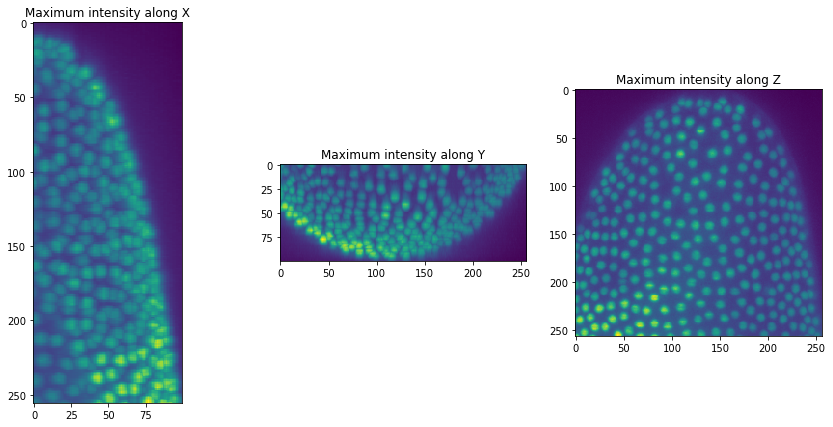

In [3]:
def orthogonal_show(image, labels=False):

    fig, axs = plt.subplots(1, 3, figsize=(15, 7))

    cle.imshow(cle.maximum_x_projection(image), plot=axs[0], labels=labels)
    cle.imshow(cle.maximum_y_projection(image), plot=axs[1], labels=labels)
    cle.imshow(cle.maximum_z_projection(image), plot=axs[2], labels=labels)
    
    axs[0].set_title("沿X轴的最大强度")
    axs[1].set_title("沿Y轴的最大强度")
    axs[2].set_title("沿Z轴的最大强度")

orthogonal_show(raw_image)

现在我们可以对数据集中的细胞核进行分割。

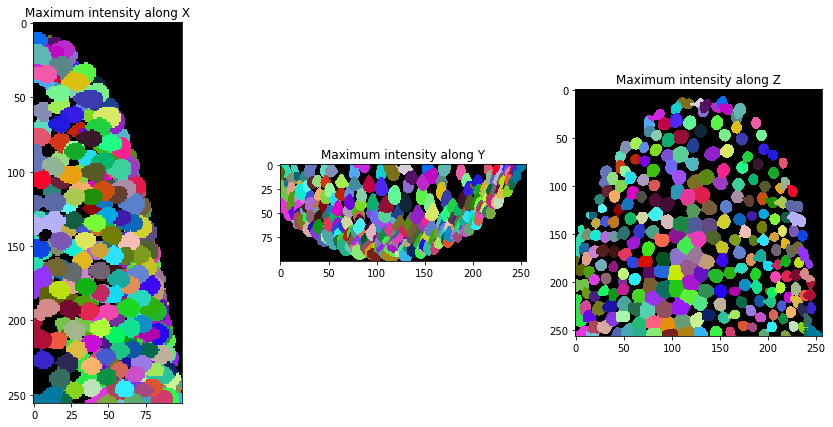

In [4]:
background_subtracted = cle.top_hat_box(raw_image, radius_x=5, radius_y=5, radius_z=5)

nuclei = cle.voronoi_otsu_labeling(background_subtracted)

orthogonal_show(nuclei, labels=True)

分割后，我们稍微扩展一下标签，使它们相互接触。

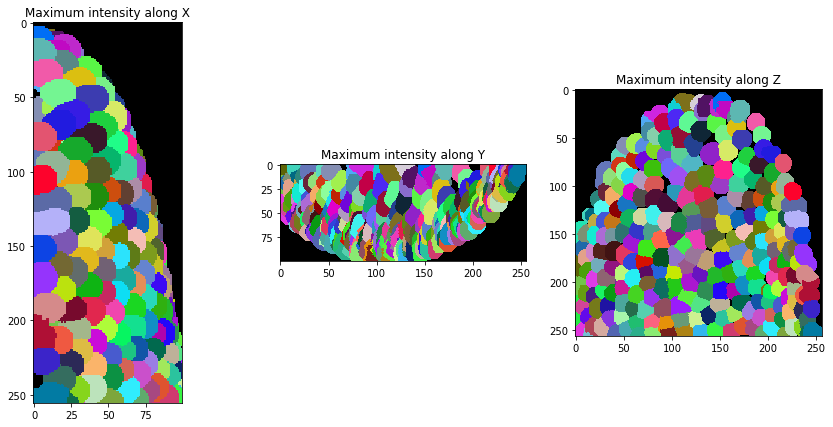

In [5]:
expanded_nuclei = cle.dilate_labels(nuclei, radius=4)

orthogonal_show(expanded_nuclei, labels=True)

然后，我们可以可视化接触邻居之间的（质心）距离网格。

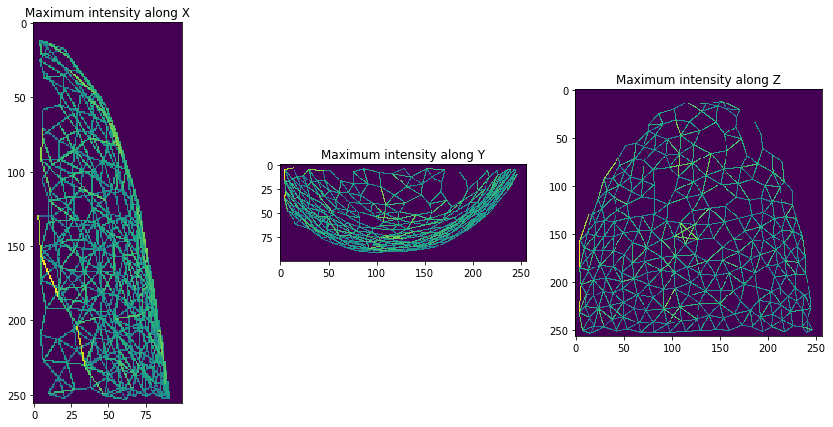

In [6]:
mesh = cle.draw_distance_mesh_between_touching_labels(expanded_nuclei)

orthogonal_show(mesh)